In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing import sequence
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn.datasets import fetch_20newsgroups
from keras.models import Sequential

In [62]:
data = fetch_20newsgroups(subset='train')
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [63]:
max_features = 20000
batch_size = 32
k=['alt.atheism','rec.autos']
train_data = fetch_20newsgroups(subset='train', categories=k, random_state=32)
test_data = fetch_20newsgroups(subset='test',categories=k, random_state=32)

In [64]:
train_target = train_data.target

In [65]:
test_target = test_data.target

In [66]:

vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95)
train_data = vectorizer.fit_transform(train_data.data)
test_data = vectorizer.transform(test_data.data)
train_data = train_data.todense()
test_data = test_data.todense()

In [67]:
train_data.shape

(1074, 2380)

In [68]:
test_data.shape

(715, 2380)

In [69]:
train_target.shape

(1074,)

In [70]:
test_target.shape

(715,)

In [71]:
n_train = train_data.shape[0]
train_data = train_data[:n_train, :]
train_target = train_target[:n_train]

In [49]:
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
              metrics=['accuracy'])
# model.fit(train_data, train_labels,
#           batch_size=batch_size,
#           epochs=1,
# validation_data=(test_data, train_labels))
history = model.fit(train_data, train_target, epochs=2, verbose=True, validation_data=(train_data, train_target), batch_size=32)
score, accuracy = model.evaluate(test_data, test_target, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accuracy)
# print(train_data.shape)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1074 samples, validate on 1074 samples
Epoch 1/2
1074/1074 [==============================] - 182s 169ms/step - loss: 6.8528 - accuracy: 0.5531 - val_loss: 6.8153 - val_accuracy: 0.5531
Epoch 2/2
715/715 [==============================] - 8s 11ms/step
Test score: 6.803506473727993
Test accuracy: 0.5538461804389954


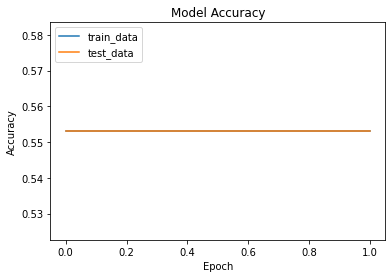

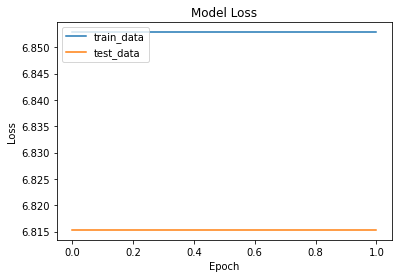

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_data', 'test_data'], loc='upper left')
plt.show()

# For Loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_data', 'test_data'], loc='upper left')
plt.show()

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 1s 96us/step - loss: 1.6697 - acc: 0.6751 - val_loss: 0.7319 - val_acc: 0.8706
Epoch 2/5
8485/8485 [==============================] - 1s 91us/step - loss: 0.3676 - acc: 0.9490 - val_loss: 0.4576 - val_acc: 0.9056
Epoch 3/5
8485/8485 [==============================] - 1s 86us/step - loss: 0.1645 - acc: 0.9833 - val_loss: 0.3918 - val_acc: 0.9127
Epoch 4/5
8485/8485 [==============================] - 1s 87us/step - loss: 0.0880 - acc: 0.9952 - val_loss: 0.3613 - val_acc: 0.9169
Epoch 5/5
2829/2829 [==============================] - 0s 87us/step
Loss: 0.34681137222711084
Accuracy: 0.9165782928466797


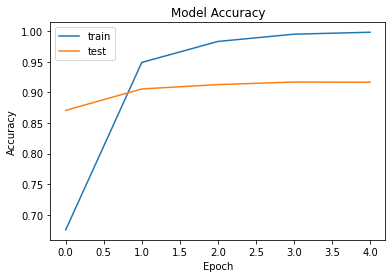

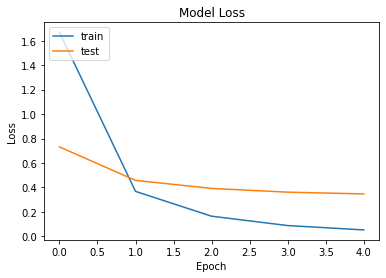

In [52]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from keras.layers.embeddings import Embedding
from keras.layers import Flatten


twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
y = twenty_train.target
sentences = twenty_train.data

max_review_len = max([len(s.split()) for s in sentences])


tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Build model
model = Sequential()
model.add(layers.Dense(300, input_dim=max_review_len, activation='relu'))
model.add(layers.Dense(20,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

# Output
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: {}".format(loss))
print("Accuracy: {}".format(accuracy))

# For Accuracy Values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# For Loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()